In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] #花弁の長さと幅
y = iris.target #花の名前

tree_clf = DecisionTreeClassifier(max_depth=2)#クラス決定木
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [6]:
import numpy as np
import os
#Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

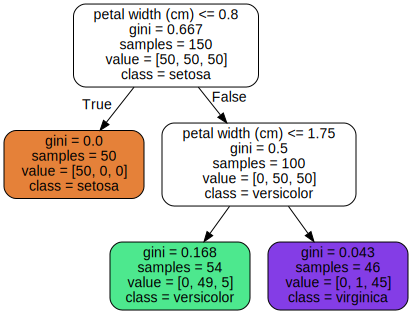

In [11]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
    tree_clf,#可視化したいモデル
    out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),#出力するファイル名と形式
    feature_names=iris.feature_names[2:],#特徴量名
    class_names=iris.target_names,#クラス名
    rounded=True,#draw node boxes with rounded corners and use Helvetica fonts 
    filled=True#塗りつぶしあり
)
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [13]:
! dot -Tpng ./images/iris_tree.dot -o iris_tree.png

gini...ノードの不純度（impurity)を示す➡ジニ係数で計算\
$G_i = 1 - \Sigma_{k=1}^np_{i,k}^2$\
$p_{i,k}$はi番目のノードの訓練インスタンス数のなかのクラスｋのインスタンスの割合。

samples: そのノードが何個の訓練インスタンスを処理したか

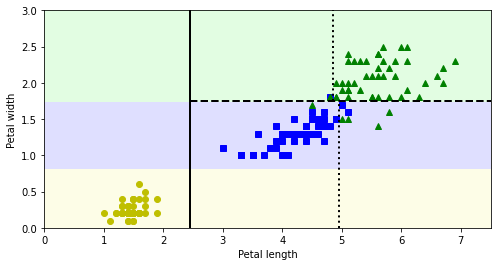

In [29]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3]):
    x1s = np.linspace(axes[0],axes[1], 100)#0,0.075,0.15...
    x2s = np.linspace(axes[2], axes[3], 100)#0,0.003,0.006...
    
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new=np.c_[x1.ravel(), x2.ravel()]
    y_pred=clf.predict(X_new).reshape(x1.shape)
    custom_cmap=ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.plot(X[:,0][y==0], X[:,1][y==0], "yo", label="Iris setosa")
    plt.plot(X[:,0][y==1], X[:,1][y==1], "bs", label="Iris versicolor")
    plt.plot(X[:,0][y==2], X[:,1][y==2], "g^", label="Iris verginica")
    plt.axis(axes)
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)

ホワイトボックスモデル（white box model)：判断が簡単に解釈できるモデル\
ブラックボックスモデル（black box model)：なぜそのような予測になったのかを言葉で説明することが難しいモデル

In [32]:
print(tree_clf.predict_proba([[5,1.5]]))
print(tree_clf.predict([[5,1.5]]))

[[0.         0.90740741 0.09259259]]
[1]


**CART（Classification and Regression Tree)アルゴリズム**\
分類用コスト関数：$J(k,t_k)=\frac{m_{left}}{m}G_{left}+\frac{m_{right}}{m}G_{right}$\
➡最も純粋なサブセットを作り出す$(k,t_k)$のペアを探す\
深さの上限に達するか、不純度を下げる分割方法が見つからなければ再帰を中止\
➡どん欲なアルゴリズム（greedy algorithm)：トップレベルで最適な分割位置をどん欲に探し、各レベルで同じプロセスを繰り返す。→数レベル降りたときに不純度が最低になるかどうかをチェックしていない\
「まずまず良い解」満足しなければならないのは、最適な気を見つけるという問題が、NP完全（NP-Complete)問題だから

予測する計算量は$O(\log_2(m))$\
特徴量の数がn個の時は$O(n\times\log_2(m))$

不純度の指標
* ジニ不純度（GINI impurity)
* エントロピー（entropy)
エントロピーの式：$H_i = -\Sigma_{k=1, p_{i,k}\neq0}^n p_{i,k} \log_2(p_{i,k})$\
ほとんどの場合、どちらを使っても大差はない

ノンパラメトリックモデル（nonparametric model):訓練データに対してほとんど先入観（asumption:仮定、前提条件）を持たない→制約を設けなければ訓練データに密接に適合するため過学習しやすい(e.g.決定木）\
パラメトリックモデル（parametric model)：あらかじめ決められた数のパラメータがあるため、自由度が制限され、過学習のリスクが低くなっている（e.g.線形モデル）\

決定木における正則化
* max_depthハイパーパラメータで決定木の深さの上限を制限
* min_samples_split(ノードを分割するために必要なサンプル数の下限）
* min_samples_leaf(葉ノードが持たなければならないサンプル数の下限）
* min_weight_fraction_leaf(min_samples_leafと同じだが、重み付きインスタンスの総数に対する割合で表現）
* max_leaf_nodes(葉ノードの数の上限）
* max_features(各ノードで分割のために評価される特徴量数の上限）
* 不要なノードの剪定（pruning:削除）：統計学的に有意（statistically significant)かどうかをカイ二乗検定（p値:p-valueが閾値よりも高ければ、ノードは不要）などの標準的な統計学的検定法によって推計
min_ハイパーパラメータを増やすかmax_ハイパーパラメータを減らす

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

回帰の場合は不純度ではなくMSEが最小になるように訓練セットを分割している\
コスト関数：$J(k, t_k) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}\:  where \: \left\{ \,
    \begin{aligned}
    & MSE_{node}=\Sigma_{i\in node}(\hat{y}_{node} - y^{(i)})^2\\
    & \hat{y}_{node}=\frac{1}{m_{node}}\Sigma_{i\in node}y^{(i)}
    \end{aligned}
\right.
$

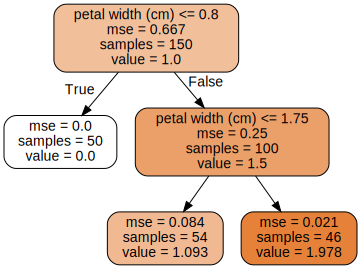

In [39]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
    tree_reg,#可視化したいモデル
    out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),#出力するファイル名と形式
    feature_names=iris.feature_names[2:],#特徴量名
    class_names=iris.target_names,#クラス名
    rounded=True,#draw node boxes with rounded corners and use Helvetica fonts 
    filled=True#塗りつぶしあり
)
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

決定木のデメリット
* 決定木の決定境界は直交→訓練セットの回転によって結果が大きく変わる。➡PCA(主成分分析）を使えばある程度軽減できる
* 訓練セットの小さな変化に敏感すぎる
* 同じ訓練データを使っていても大きく異なるモデルが作られることがある➡ランダムフォレスト